# t-ETE Plots of Dataset by Type

Confirm grouping of samples by type

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import rnaseq_lib as rna
from progressbar import ProgressBar

from IPython.display import display

## Inputs

In [4]:
df_path = '/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv'
met_path = '/mnt/rna-seq-analysis/metadata/tcga_gtex_metadata_intersect.tsv'

In [5]:
%%time
met = pd.read_csv(met_path, index_col=0, sep='\t')
df = pd.read_csv(df_path, index_col=0, sep='\t')

CPU times: user 5min 38s, sys: 7.77 s, total: 5min 45s
Wall time: 5min 45s


## Collect Plotting Information

In [6]:
tissues = ['Adrenal', 'Bladder', 'Brain', 'Breast', 'Cervix', 'Colon', 'Small_intestine', 'Esophagus', 'Kidney', 
           'Liver', 'Lung', 'Ovary', 'Pancreas', 'Prostate', 'Skin', 'Head', 'Stomach', 'Testis', 'Thyroid', 'Uterus']

Run t-ETE for each set of tissue samples

In [7]:
%%time
plots = {}

bar = ProgressBar()
for t in bar(tissues):
    # Create plot object with sample and type info
    plot = met[met.tissue == t][['id', 'type', 'tumor']].drop_duplicates()
    samples = [x for x in plot.index if x in df.columns]
    plot = plot.loc[samples]  
    
    # Run t-ETE on samples
    z = rna.dim_red.run_tete(np.array(df[samples].T))
    
    # Add results and save
    plot['x'] = z[:, 0]
    plot['y'] = z[:, 1]
    plots[t] = plot

CPU times: user 41min 16s, sys: 2min 24s, total: 43min 41s
Wall time: 32min 46s


100% |########################################################################|


## Plots

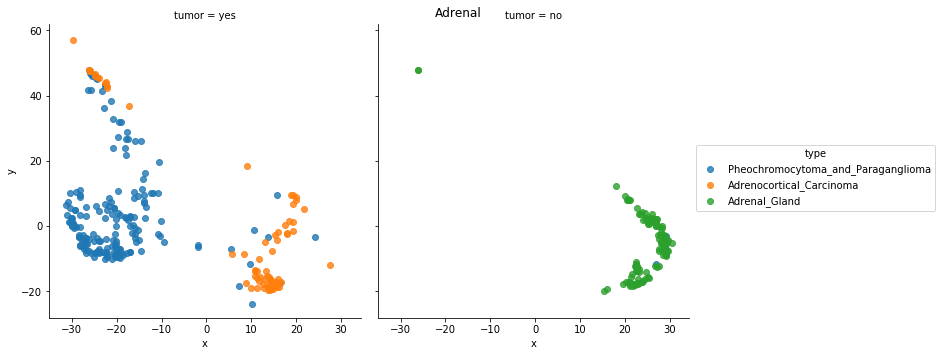

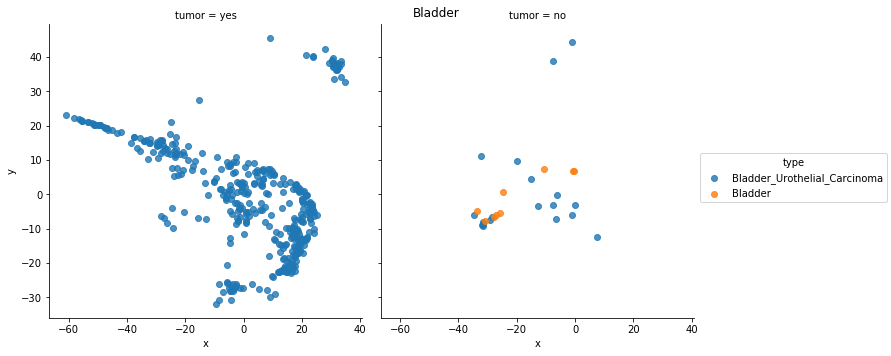

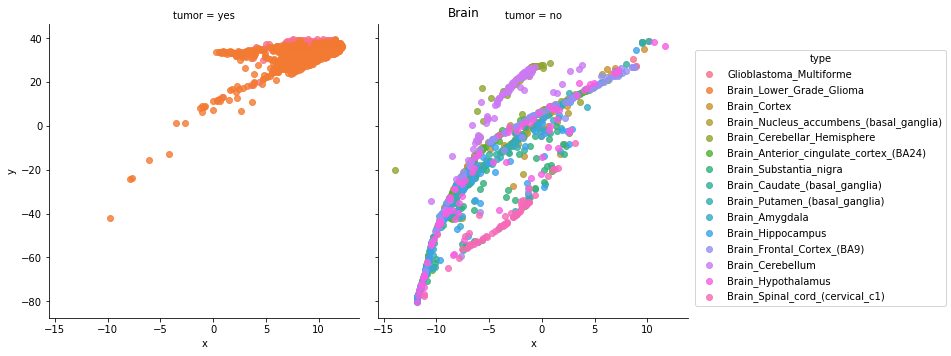

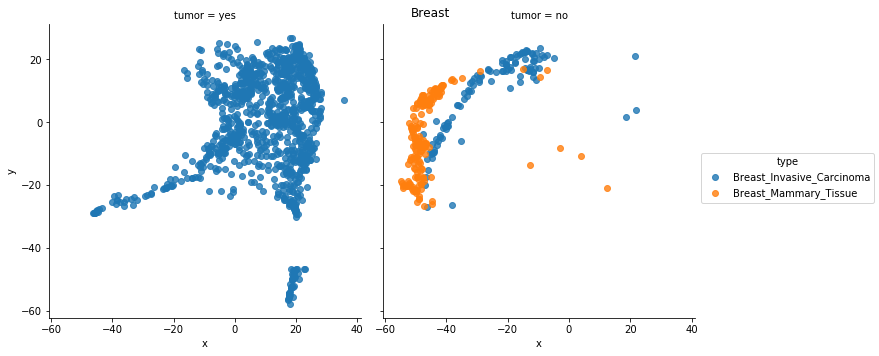

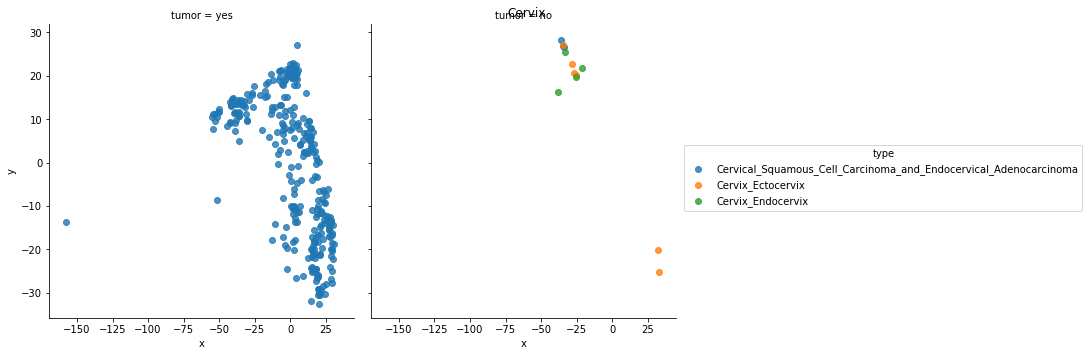

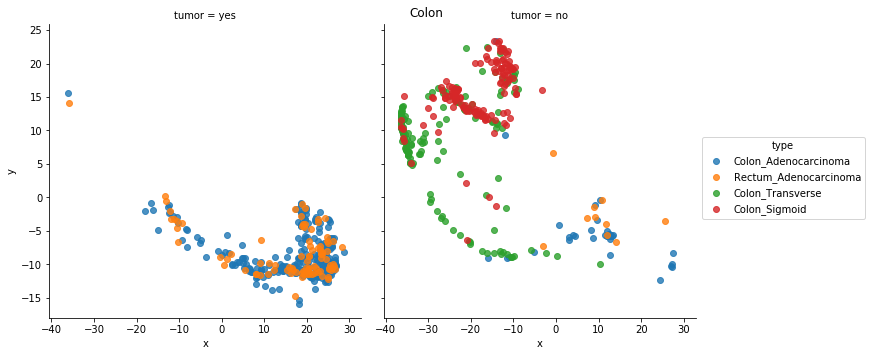

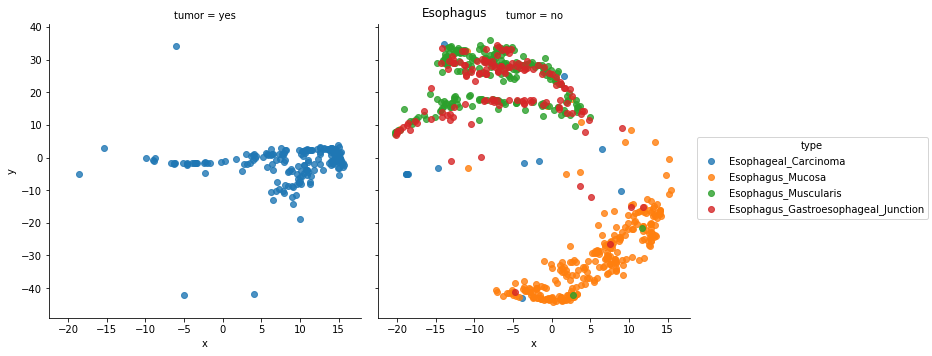

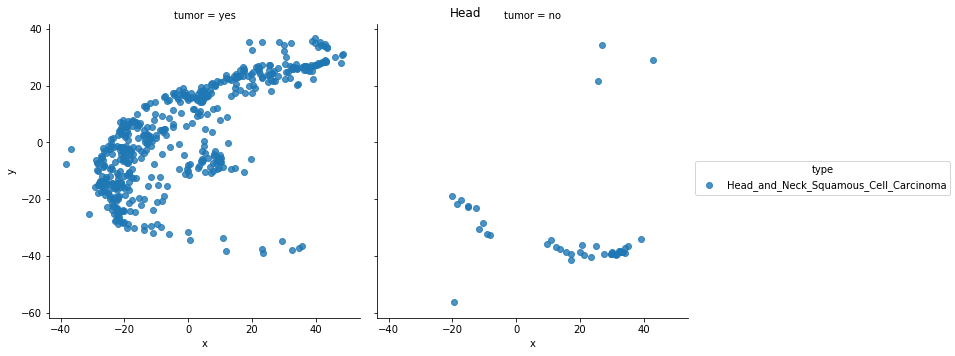

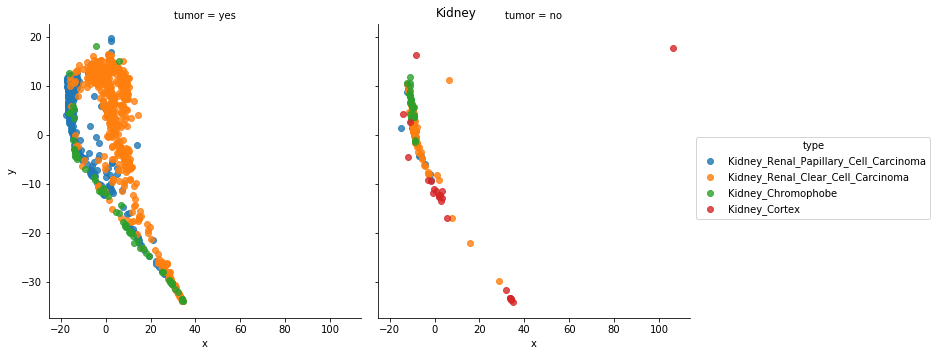

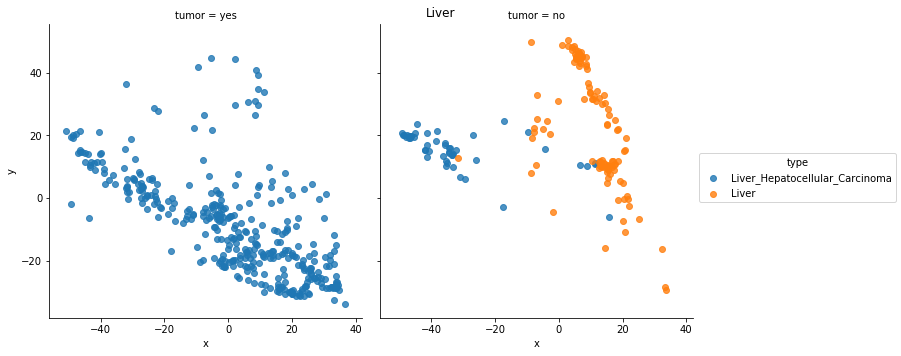

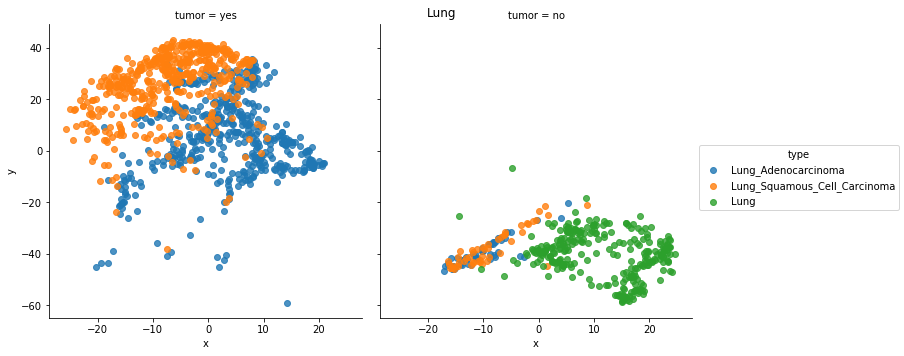

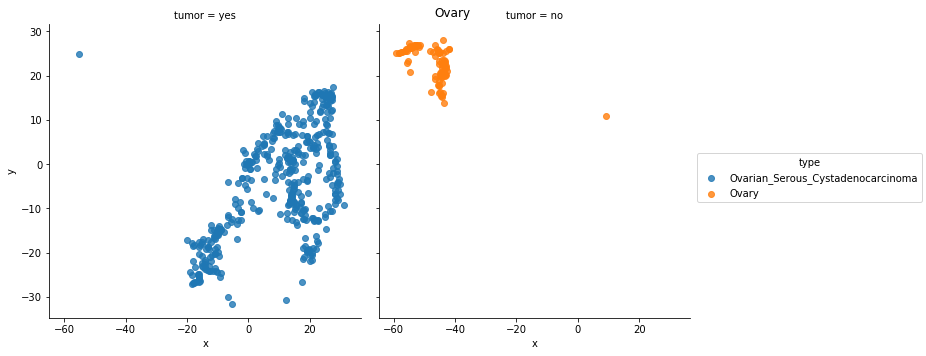

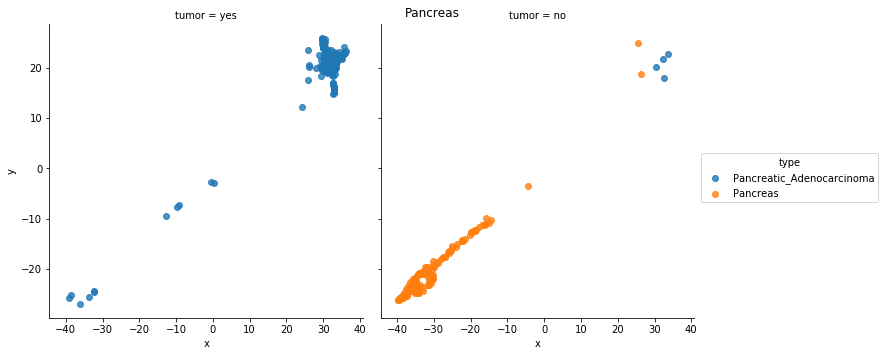

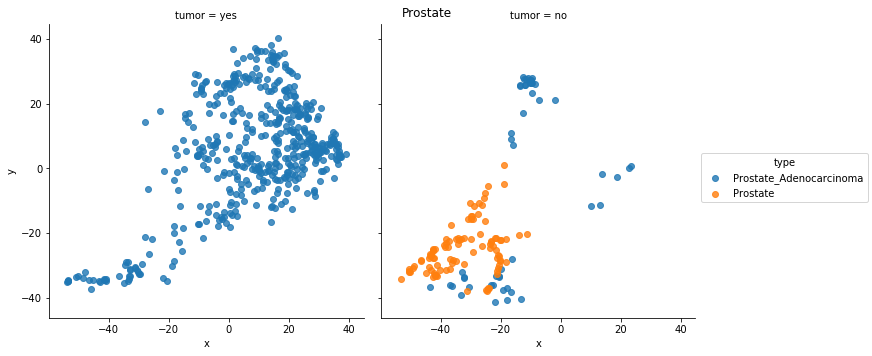

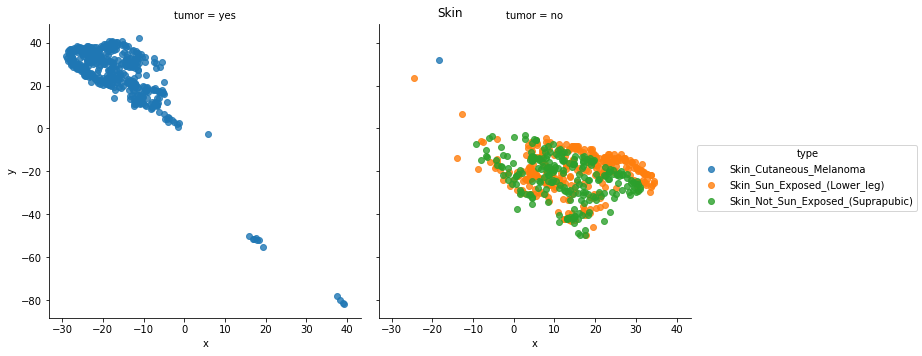

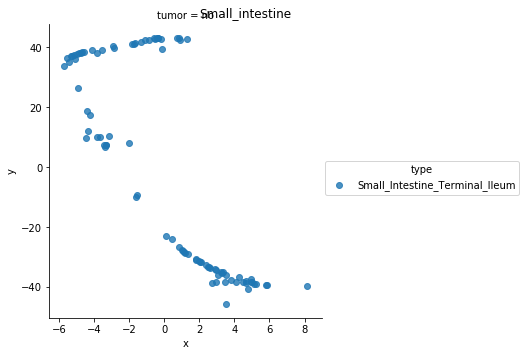

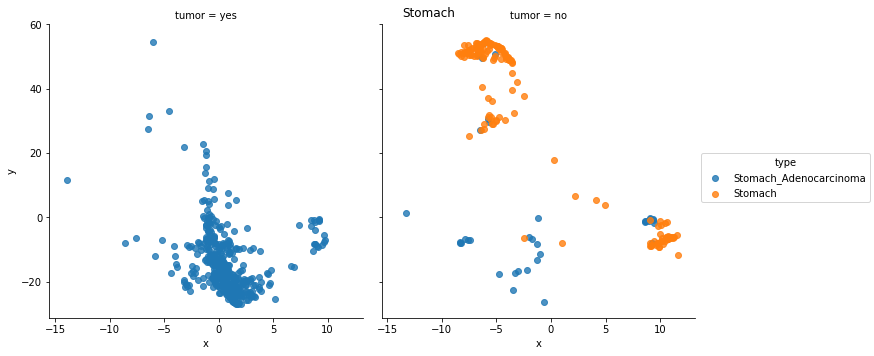

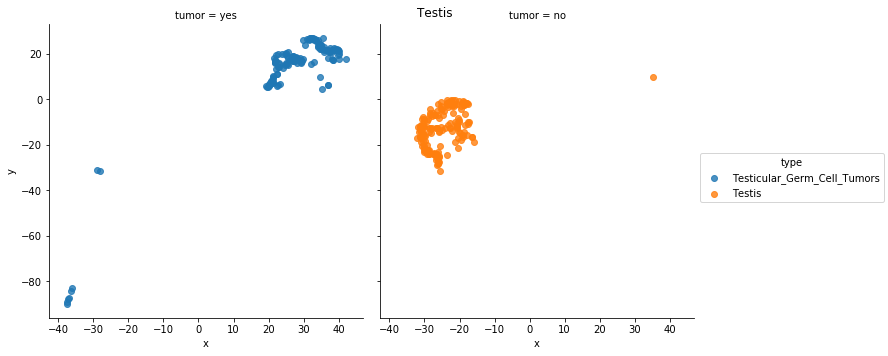

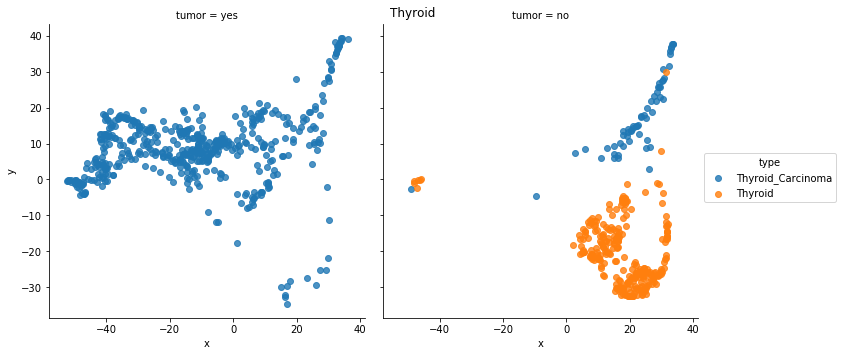

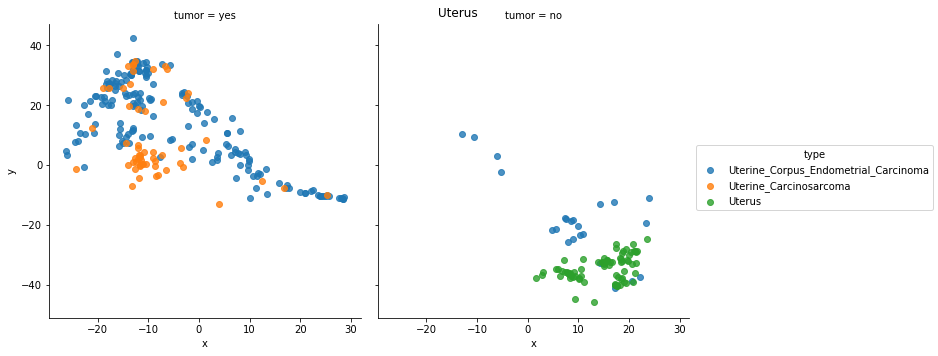

In [10]:
for tissue in sorted(plots):
    data = pd.DataFrame.from_dict(plots[tissue])
    sns.lmplot(data=data, x='x', y='y', hue='type', fit_reg=False, col='tumor')
    plt.suptitle(tissue)